# Machine Learning Challenge 1
Deadline: 2021-16-04 18:00

by TEAMNAME

Cezary Zaboklicki, Manuel Wissiak and Maximilian Stollmayer

## Data Analysis
First we will import the relevant libraries for the data structures and for plotting. Then we load in the given training data and look at some of its statistics.

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sn

plt.rcdefaults()
plt.style.use("seaborn")
plt.rc("figure", figsize=(11.2, 6.3))

In [2]:
trainData = pd.read_csv("data_train_db.csv")
trainData.describe()

,Running,Blue Switch On,Battery level,Humidity,Magnetic field,Controller beige,Controller bisque,Controller black,Controller blanchedalmond,Time since restart,...,Waste level right tank,Waste level left tank,Helium reservoir,alpha-radiation,Active motion supression,Blade density,Blade rotation,Controller mintcream,Controller mistyrose,Controller moccasin
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,0.311500,0.824642,0.732381,0.670628,0.658450,0.732612,0.724687,0.710984,0.650322,5.055976,...,0.727262,0.696894,0.750866,0.734427,0.709659,0.718897,0.657022,0.713340,0.737840,0.658718
std,0.463222,0.712109,2.280995,1.275480,1.410498,0.932445,1.290294,0.546794,1.896914,2.913774,...,1.486712,1.137658,1.026275,1.003642,1.767397,0.881690,2.225722,1.950032,1.714560,1.515071
min,0.000000,-22.759721,-38.055832,-40.878137,-50.779683,0.400771,-18.190763,-9.042823,-58.024379,-16.002695,...,-10.323221,-37.190701,0.400418,-2.200456,-35.383528,-14.777491,-78.787165,-59.091836,-38.224559,-63.751219
25%,0.000000,1.000000,0.549734,0.542930,0.551090,0.555667,0.549273,0.560411,0.545552,2.604643,...,0.547473,0.544204,0.557663,0.542622,0.558572,0.553339,0.554327,0.548380,0.551331,0.548054
50%,0.000000,1.000000,0.698123,0.696592,0.706609,0.698498,0.690762,0.704883,0.686504,5.259820,...,0.693606,0.690501,0.710034,0.703849,0.700996,0.710563,0.704225,0.703970,0.702484,0.706985
75%,1.000000,1.000000,0.849506,0.844798,0.852589,0.850872,0.851927,0.851071,0.847418,7.473587,...,0.849670,0.848295,0.852120,0.849593,0.850362,0.851460,0.862595,0.859953,0.851893,0.847668
max,1.000000,12.440382,77.644402,26.567088,2.181685,37.371873,49.427813,15.914141,41.007128,15.007247,...,64.521486,24.881777,27.812705,37.703893,63.615672,21.558254,33.059216,45.192744,50.991319,3.883941


To better visualize these statistics we will splitt the data into 'Running' and 'Not running' groups and plot the mean, standard deviation, minimum and maximum by column and as a histogram.

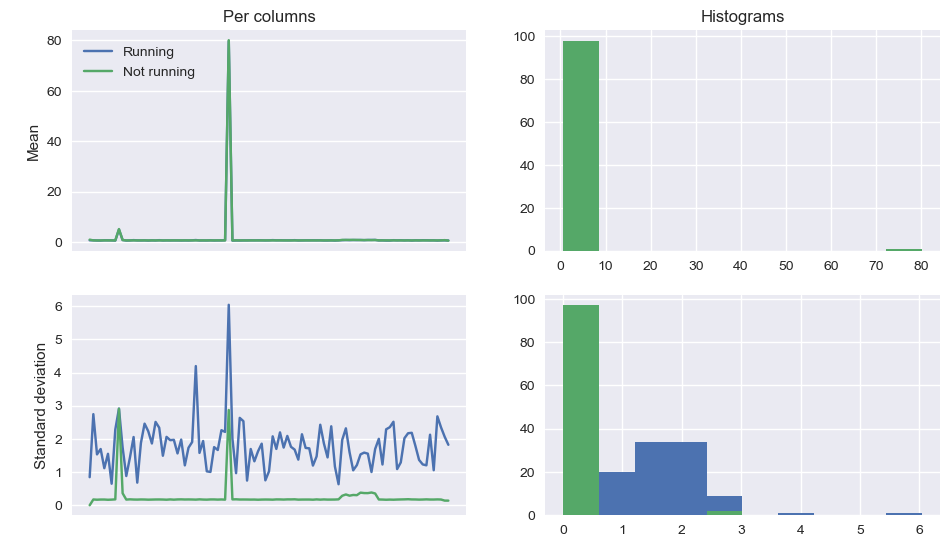

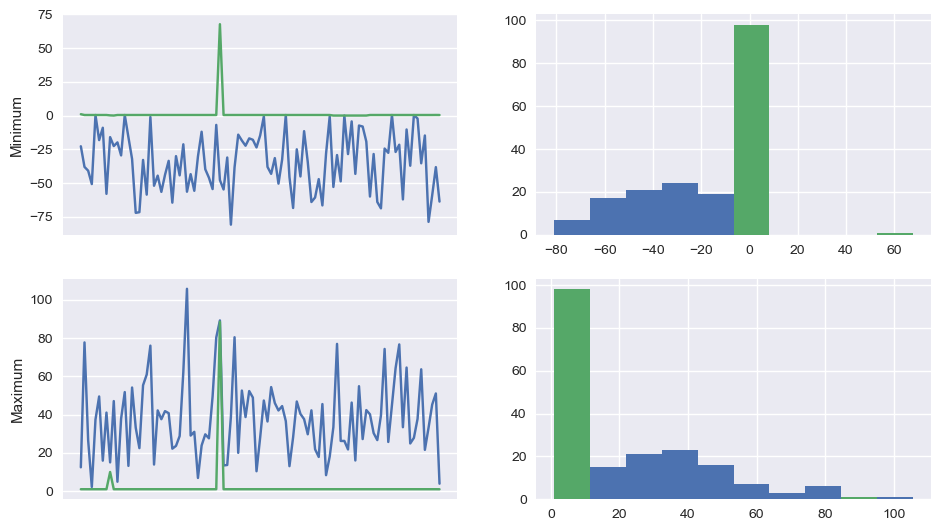

In [3]:
runningGroup = trainData.groupby("Running")

fig1, axs1 = plt.subplots(2, 2)

runningGroup.mean().T.plot(ax=axs1[0,0], legend=False, xticks=[])
runningGroup.mean().T.plot(kind="hist", ax=axs1[0,1], legend=False)
axs1[0,0].set_ylabel("Mean")
axs1[0,1].set_ylabel("")
axs1[0,0].set_title("Per columns")
axs1[0,1].set_title("Histograms")

runningGroup.std().T.plot(ax=axs1[1,0], legend=False, xticks=[])
runningGroup.std().T.plot(kind="hist", ax=axs1[1,1], legend=False)
axs1[1,0].set_ylabel("Standard deviation")
axs1[1,1].set_ylabel("")

fig1.legend(labels = ["Running", "Not running"], bbox_to_anchor=(0.185, 0.815))
plt.show()


fig2, axs2 = plt.subplots(2, 2)

runningGroup.min().T.plot(ax=axs2[0,0], legend=False, xticks=[])
runningGroup.min().T.plot(kind="hist", ax=axs2[0,1], legend=False)
axs2[0,0].set_ylabel("Minimum")
axs2[0,1].set_ylabel("")

runningGroup.max().T.plot(ax=axs2[1,0], legend=False, xticks=[])
runningGroup.max().T.plot(kind="hist", ax=axs2[1,1], legend=False)
axs2[1,0].set_ylabel("Maximum")
axs2[1,1].set_ylabel("")

plt.show()

We observe that there is a large discrepancy between the two labels. The minimum and maximum are also often outside the accepted range of values in some columns hinting at some corrupted rows, e.g. 'Blue Switch On' should only have binary data points.

### Data Cleanup
We will now remove rows that have data points that do not lie in the accepted range of values.

In [4]:
binaryCols = ["Running", "Blue Switch On", "User had coffee", "Controller lightgoldenrodyellow", "Controller lightgray",
              "Controller lightgreen", "Cruise control", "Voltage main", "Voltage secondary", "Counterweight",
              "Second Counterweight", "Smoke formation", "Bending of test plate"]
nonnegativeCols = ["Time since restart"]
intervalCols = trainData.columns.difference(binaryCols).difference(nonnegativeCols).difference(["CPU Temperature"])

for col in binaryCols:
    dropIndices = trainData[(trainData[col] != 0) & (trainData[col] != 1)].index

for col in nonnegativeCols:
    dropIndices.append(trainData[trainData[col] < 0].index)

for col in intervalCols:
    dropIndices.append(trainData[(trainData[col] > 1) | (trainData[col] < 0)].index)
    
cleanData = trainData.drop(index = dropIndices).drop_duplicates().reset_index(drop=True)
cleanData.describe()

,Running,Blue Switch On,Battery level,Humidity,Magnetic field,Controller beige,Controller bisque,Controller black,Controller blanchedalmond,Time since restart,...,Waste level right tank,Waste level left tank,Helium reservoir,alpha-radiation,Active motion supression,Blade density,Blade rotation,Controller mintcream,Controller mistyrose,Controller moccasin
count,1995.000000,1995.000000,1995.000000,1995.000000,1995.000000,1995.000000,1995.000000,1995.000000,1995.000000,1995.000000,...,1995.000000,1995.000000,1995.000000,1995.000000,1995.000000,1995.000000,1995.000000,1995.000000,1995.000000,1995.000000
mean,0.312281,0.832080,0.698674,0.697404,0.702571,0.700912,0.699846,0.702833,0.695250,5.073251,...,0.697903,0.693599,0.704726,0.698827,0.701909,0.703049,0.706045,0.704670,0.702116,0.700706
std,0.463540,0.373889,0.174314,0.173770,0.173834,0.171117,0.173182,0.169713,0.173674,2.843286,...,0.174287,0.173832,0.170447,0.173419,0.171490,0.172158,0.176289,0.174138,0.173852,0.172825
min,0.000000,0.000000,0.400116,0.400507,0.400011,0.400771,0.400043,0.400128,0.400529,0.120367,...,0.400186,0.400070,0.400418,0.400256,0.400126,0.400041,0.400217,0.400230,0.400042,0.400339
25%,0.000000,1.000000,0.550249,0.544759,0.551983,0.555082,0.549291,0.560581,0.545835,2.620323,...,0.547633,0.544276,0.557506,0.542619,0.559102,0.553587,0.554721,0.548436,0.551295,0.548286
50%,0.000000,1.000000,0.698211,0.697266,0.707337,0.698051,0.690699,0.704544,0.686944,5.260622,...,0.693302,0.690485,0.709883,0.703575,0.701014,0.710466,0.704343,0.703867,0.702430,0.707089
75%,1.000000,1.000000,0.848981,0.844847,0.852291,0.848753,0.851189,0.850115,0.847443,7.475802,...,0.849355,0.847620,0.850643,0.847915,0.849944,0.850547,0.862463,0.859593,0.851007,0.847130
max,1.000000,1.000000,0.999983,0.999903,0.999910,0.999647,0.999997,0.999594,0.999753,9.988460,...,0.999854,0.999861,0.999526,0.999934,0.999992,0.998959,0.999804,0.999978,0.999159,0.999895


Again we plot the mean, standard deviation, minimum and maximum by column and as a histogram.

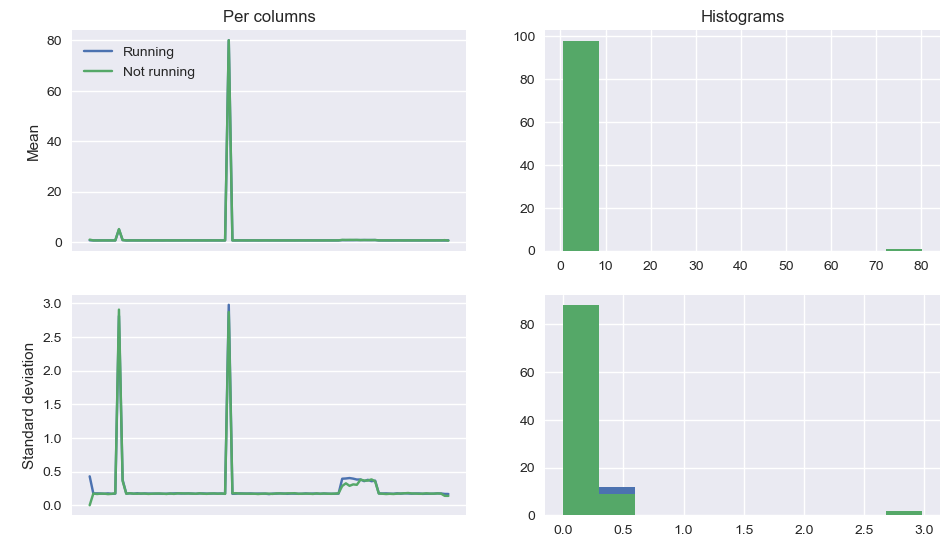

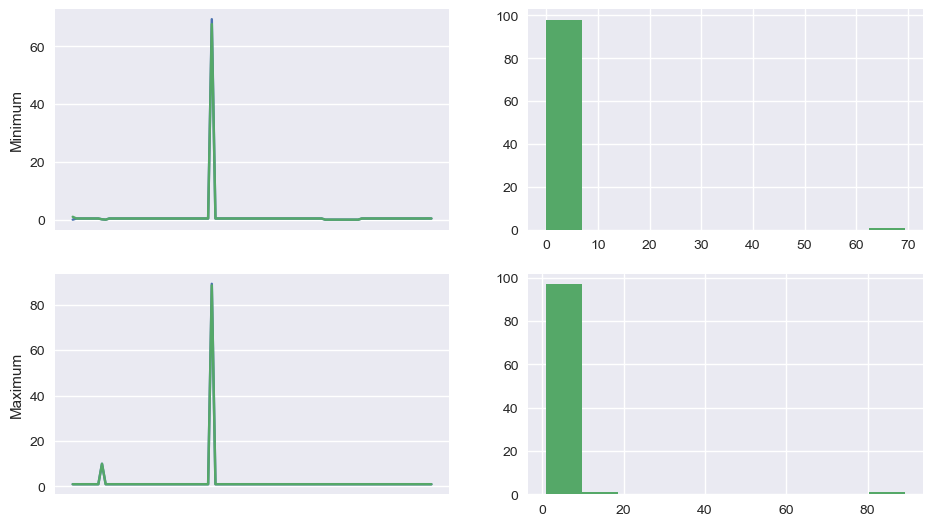

In [5]:
cleanGroup = cleanData.groupby("Running")

fig1, axs1 = plt.subplots(2, 2)

cleanGroup.mean().T.plot(ax=axs1[0,0], legend=False, xticks=[])
cleanGroup.mean().T.plot(kind="hist", ax=axs1[0,1], legend=False)
axs1[0,0].set_ylabel("Mean")
axs1[0,0].set_title("Per columns")
axs1[0,1].set_ylabel("")
axs1[0,1].set_title("Histograms")

cleanGroup.std().T.plot(ax=axs1[1,0], legend=False, xticks=[])
cleanGroup.std().T.plot(kind="hist", ax=axs1[1,1], legend=False)
axs1[1,0].set_ylabel("Standard deviation")
axs1[1,1].set_ylabel("")

fig1.legend(labels = ["Running", "Not running"], bbox_to_anchor=(0.185, 0.815))
plt.show()


fig2, axs2 = plt.subplots(2, 2)

cleanGroup.min().T.plot(ax=axs2[0,0], legend=False, xticks=[])
cleanGroup.min().T.plot(kind="hist", ax=axs2[0,1], legend=False)
axs2[0,0].set_ylabel("Minimum")
axs2[0,1].set_ylabel("")

cleanGroup.max().T.plot(ax=axs2[1,0], legend=False, xticks=[])
cleanGroup.max().T.plot(kind="hist", ax=axs2[1,1], legend=False)
axs2[1,0].set_ylabel("Maximum")
axs2[1,1].set_ylabel("")

plt.show()

The distribution of our data is now largely the same for both 'Running' and 'Not running' except for some highly correlated columns which we will look at later.

### Balanced Training and Test Set
The number of 'Running' and 'Not running' labels are not equal. To not include a bias in the classifier for either label we balance the data set by oversampling the 'Running' entries.

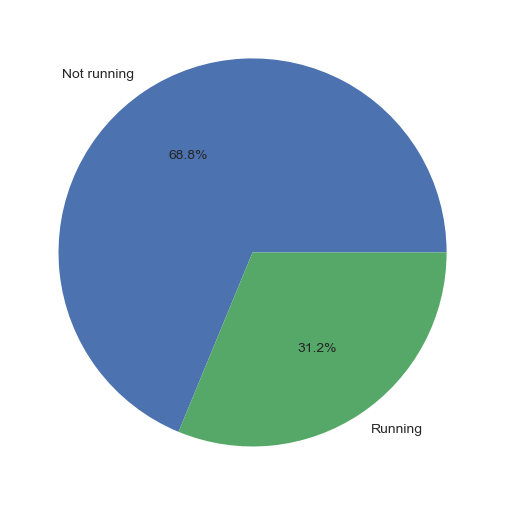

In [6]:
cleanData["Running"].value_counts().plot(kind="pie", labels=["Not running", "Running"], label="", autopct="%0.1f%%")
plt.show()

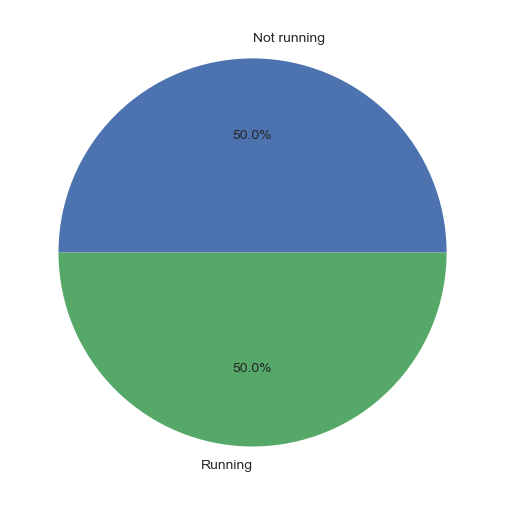

In [7]:
copyAmount = cleanData.shape[0] - 2 * cleanData[cleanData["Running"] == 1].shape[0]
balancedData = cleanData.append(cleanData[cleanData["Running"] == 1].sample(copyAmount, replace=True)).reset_index(drop=True)

balancedData["Running"].value_counts().plot(kind="pie", labels=["Not running", "Running"], label="", autopct="%0.1f%%")
plt.show()

Now we split the balanced data into training data, training labels, test data and test labels sets.

In [8]:
'''runningData = balancedData[balancedData["Running"] == 1].sample(50)
notRunningData = balancedData[balancedData["Running"] == 0].sample(50)
testSet = pd.concat([runningData, notRunningData])
trainSet = balancedData.drop(testSet.index)

trainData = trainSet.iloc[:, 1:].values
trainLabels = trainSet["Running"].values
testData = testSet.iloc[:, 1:].values
testLabels = testSet["Running"].values

np.savetxt("train_data.csv", trainData, delimiter=',')
np.savetxt("train_labels.csv", trainLabels, delimiter=',')
np.savetxt("test_data.csv", testData, delimiter=',')
np.savetxt("test_labels.csv", testLabels, delimiter=',')'''

trainData = np.genfromtxt("train_data.csv", delimiter=',')
trainLabels = np.genfromtxt("train_labels.csv", delimiter=',')
testData = np.genfromtxt("test_data.csv", delimiter=',')
testLabels = np.genfromtxt("test_labels.csv", delimiter=',')

### Simple Classifier
To get a feel for the dependencies between the columns we plot the correlation matrix and the correlation of every other column with 'Running'.

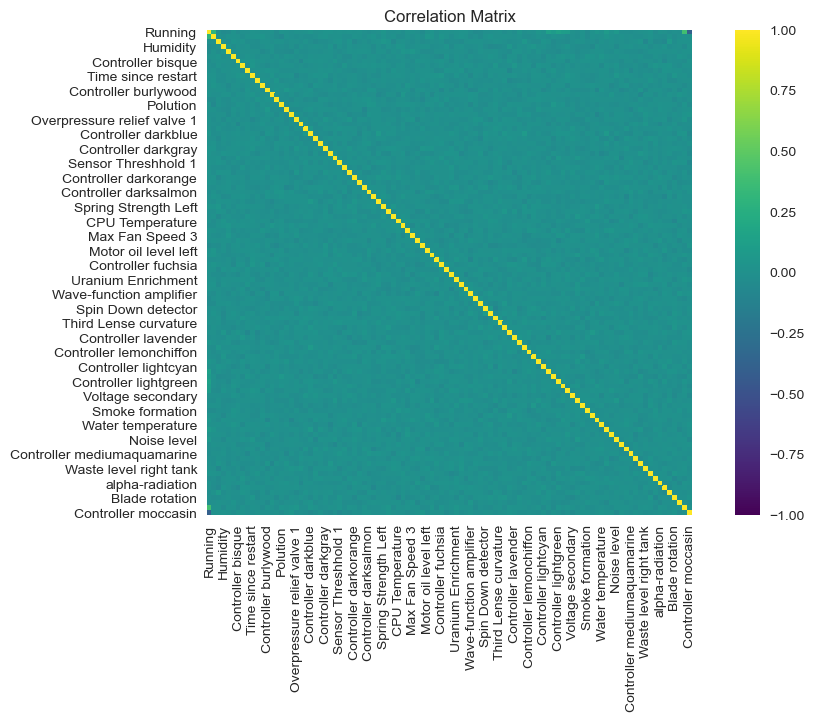

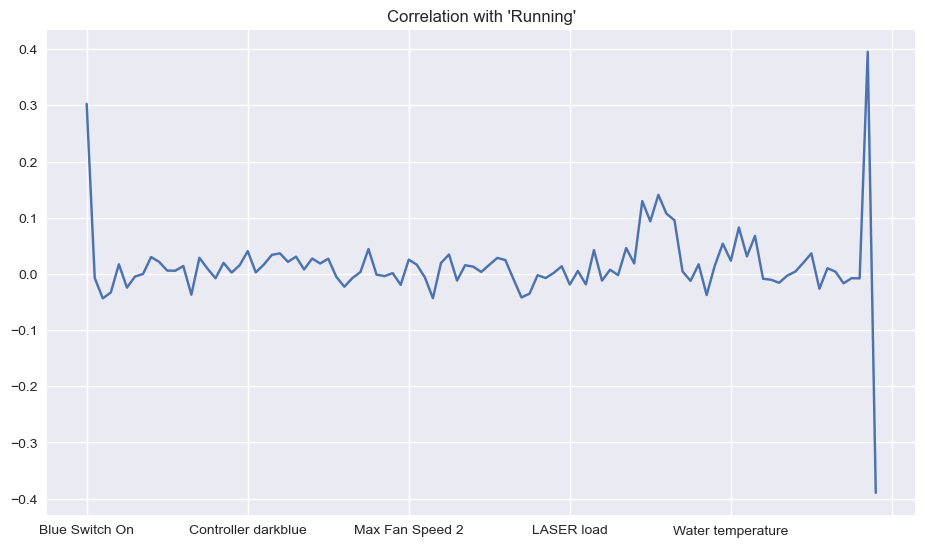

In [9]:
sn.heatmap(cleanData.corr(), cmap="viridis", square=True, vmin=-1, vmax=1)
plt.title("Correlation Matrix")
plt.show()

cleanData.corr()["Running"][1:].plot()
plt.title("Correlation with 'Running'")
plt.show()

Three of the columns are very correlated, they are:

In [10]:
corrCols = cleanData.loc[:, cleanData.corr()["Running"].abs() > 0.2].columns[1:]
cleanData.corr()["Running"][corrCols]

Blue Switch On          0.302716
Controller mistyrose    0.395263
Controller moccasin    -0.389610
Name: Running, dtype: float64

Plotting the confusion matrix with the binary column 'Blue Switch On' we see that if the switch is off then the machine cannot run.

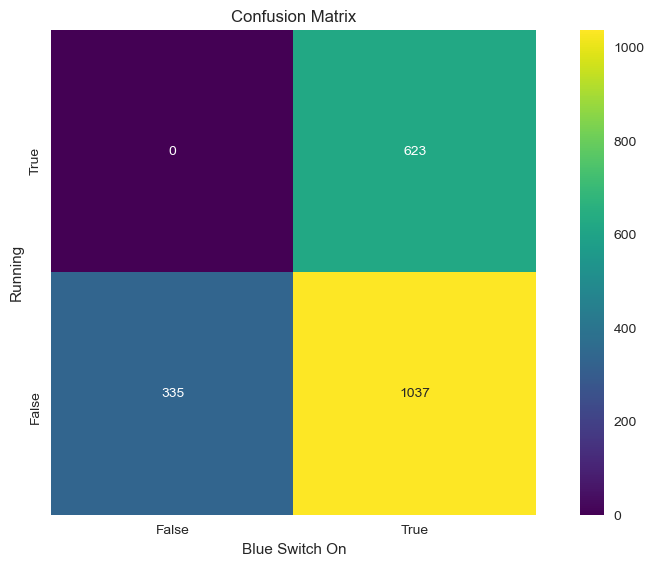

In [11]:
confusionMatrix = pd.crosstab(cleanData["Running"].astype(bool), cleanData["Blue Switch On"].astype(bool))
sn.heatmap(confusionMatrix[::-1], cmap="viridis", annot=True, square=True, fmt="d")
plt.title("Confusion Matrix")
plt.show()

In our simple classifier we will use the observation above as our first condition for labeling as 'Running' and a threshold for the difference between 'Controller mistyrose' and 'Controller moccasin' since the second one is negatively correlated. The best threshold is found by iterating through the training data and noting for which threshold the error is smallest.

In [12]:
class simpleClassifier:
    def __init__(self):
        self.bestThreshold = None
    
    def predict(self, data, threshold=None):
        threshold = threshold if threshold is not None else self.bestThreshold
        if threshold is None:
            raise Exception("Not trained yet.")
            
        switchOn = data[:, 0] == 1
        controllerDiff = data[:, -2] - data[:, -1] >= threshold
        predictedLabels = switchOn & controllerDiff
        return predictedLabels
    
    def fit(self, data, labels, meshSize=1001):
        bestError = data.shape[0]
        for threshold in np.linspace(-1, 1, meshSize):
            error = (self.predict(data, threshold=threshold) != labels).sum()
            if error < bestError:
                bestError = error
                self.bestThreshold = threshold
    
    def score(self, data, labels):
        return 1 - (self.predict(data) != labels).sum() / data.shape[0]

## Classifier Comparison
The simple classifier from above is compared to standard classifiers from the scikit-learn library.

In [13]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB

classifiers = {
    "Simple" : simpleClassifier(),
    "Nearest Neighbors" : KNeighborsClassifier(),
    "linear SVM" : SVC(kernel="linear"),
    "polynomial SVM" : SVC(kernel="poly"),
    "radial SVM" : SVC(kernel="rbf"),
    "sigmoid SVM" : SVC(kernel="sigmoid"),
    "Gaussian Process" : GaussianProcessClassifier(),
    "Decision Tree" : DecisionTreeClassifier(),
    "Random Forest" : RandomForestClassifier(),
    "AdaBoost" : AdaBoostClassifier(),
    "Neural Net" : MLPClassifier(alpha=1, max_iter=1000),
    "Naive Bayes" : GaussianNB()}

In [14]:
def compare(classifiers, trainData, trainLabels, testData, testLabels):
    df = pd.DataFrame(index=classifiers.keys(),
                      columns=["Accuracy", "'Running'", "'Not running'",
                               "True Negative", "False Negative", "False Positive", "True Positive"])

    for name, clf in classifiers.items():
        clf.fit(trainData, trainLabels)
        df.loc[name, "Accuracy"] = clf.score(testData, testLabels)

        predictedLabels = clf.predict(testData)
        labelsPercent = np.bincount(predictedLabels.astype(int)) / testData.shape[0]
        confusionPercent = pd.crosstab(testLabels, predictedLabels).values.T.flatten() / testData.shape[0]
        df.loc[name, ["'Running'", "'Not running'"]] = labelsPercent
        df.loc[name, ["True Negative", "False Negative", "False Positive", "True Positive"]] = confusionPercent

    return df.style.highlight_max("Accuracy")

compare(classifiers, trainData, trainLabels, testData, testLabels)

,Accuracy,'Running','Not running',True Negative,False Negative,False Positive,True Positive
Simple,0.890000,0.390000,0.610000,0.390000,0.000000,0.110000,0.500000
Nearest Neighbors,0.730000,0.350000,0.650000,0.290000,0.060000,0.210000,0.440000
linear SVM,0.900000,0.420000,0.580000,0.410000,0.010000,0.090000,0.490000
polynomial SVM,0.560000,0.600000,0.400000,0.330000,0.270000,0.170000,0.230000
radial SVM,0.590000,0.530000,0.470000,0.310000,0.220000,0.190000,0.280000
sigmoid SVM,0.560000,0.580000,0.420000,0.320000,0.260000,0.180000,0.240000
Gaussian Process,0.880000,0.380000,0.620000,0.380000,0.000000,0.120000,0.500000
Decision Tree,0.910000,0.450000,0.550000,0.430000,0.020000,0.070000,0.480000
Random Forest,0.960000,0.460000,0.540000,0.460000,0.000000,0.040000,0.500000
AdaBoost,0.890000,0.450000,0.550000,0.420000,0.030000,0.080000,0.470000


The decision tree and random forest usually perform the best for the random test sets but our simple classifier also achieves a very high accuracy.

Most of them are fairly balanced in their predicted labels 'Running' and 'Not running' except for naive Bayes and other than the neural network they tend to falsely label 'Running' instead of 'Not running'.

## Save Predicted Labels

In [15]:
ourClassifier = classifiers["Random Forest"]

In [16]:
predictData = pd.read_csv("data_test_db.csv").values[:, 1:]
predictedLabels = ourClassifier.predict(predictData)
np.savetxt('TEAMNAME_prediction.csv', predictedLabels, delimiter=',')